Ref: https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

About this file

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

# 1. Import Data

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('housing2.csv')
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [3]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [177]:
def convert_to_float(value):
    try:
        return float(value.replace('"','').replace("'",''))
    except:
        return np.nan

df['median_house_value'] = df['median_house_value'].apply(lambda row: convert_to_float(row))
df

longitude  latitude housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88               41.0        880.0           129.0   
1        -122.22     37.86               21.0       7099.0          1106.0   
2        -122.24     37.85               52.0       1467.0           190.0   
3        -122.25     37.85               52.0       1274.0           235.0   
4        -122.25     37.85               52.0       1627.0           280.0   
...          ...       ...                ...          ...             ...   
20635    -121.09     39.48               25.0       1665.0           374.0   
20636    -121.21     39.49               18.0        697.0           150.0   
20637    -121.22     39.43               17.0       2254.0           485.0   
20638    -121.32     39.43               18.0       1860.0           409.0   
20639    -121.24     39.37               16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [119]:
df[df['median_house_value'].isnull()]

longitude  latitude housing_median_age  total_rooms  total_bedrooms  \
5052    -119.27     34.28               50.0       1710.0           412.0   
5419    -118.26     34.16               19.0       2919.0           857.0   
5810    -121.93     37.71               26.0       4822.0           845.0   

      population  households  median_income  median_house_value  \
5052       915.0       380.0         3.1757                 NaN   
5419      1866.0       811.0         3.1733                 NaN   
5810      2288.0       805.0         4.2281                 NaN   

     ocean_proximity  
5052      NEAR OCEAN  
5419       <1H OCEAN  
5810       <1H OCEAN

In [120]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age     object
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [121]:
df['housing_median_age'].astype(float)

ValueError: could not convert string to float: '52.0"""'

In [178]:
for value in df['housing_median_age'].to_list():
    try:
        value = float(value)
    except:
        print(value)

52.0"""


In [179]:
df['housing_median_age'] = df['housing_median_age'].apply(lambda row: convert_to_float(row))

In [125]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [126]:
numerical_columns = df.select_dtypes(exclude='object').columns
numerical_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [127]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['ocean_proximity'], dtype='object')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20637 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# 3. Split Data into Train/Test to Prevent Data Leakage

<Axes: xlabel='income_cat'>

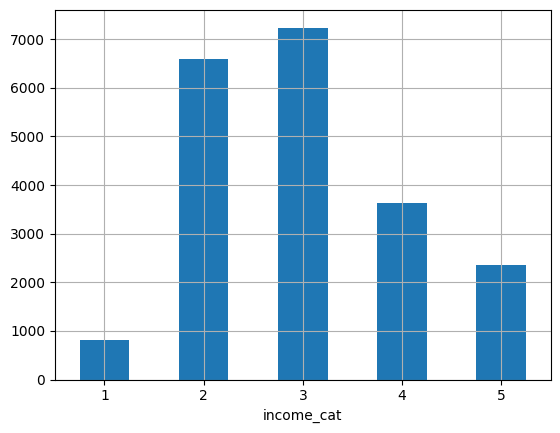

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# df = pd.read_csv('housing.csv')
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.show()


In [5]:
train, test = train_test_split(df, test_size=0.2, stratify=df['income_cat'], random_state=20240417)

In [104]:
## Check stratification
train['income_cat'].value_counts() / len(train['income_cat'])
test['income_cat'].value_counts() / len(test['income_cat'])

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

# 4. Visualize Data

<Axes: xlabel='longitude', ylabel='latitude'>

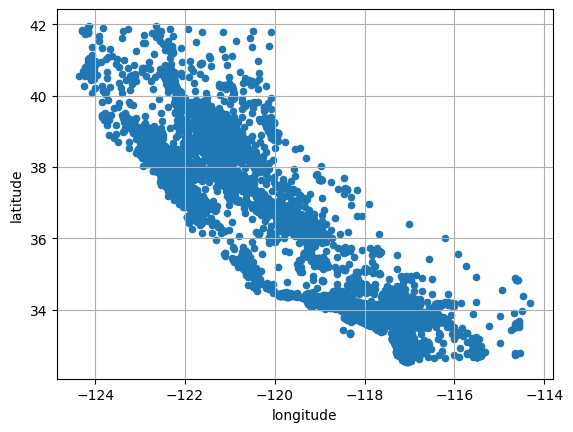

In [110]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

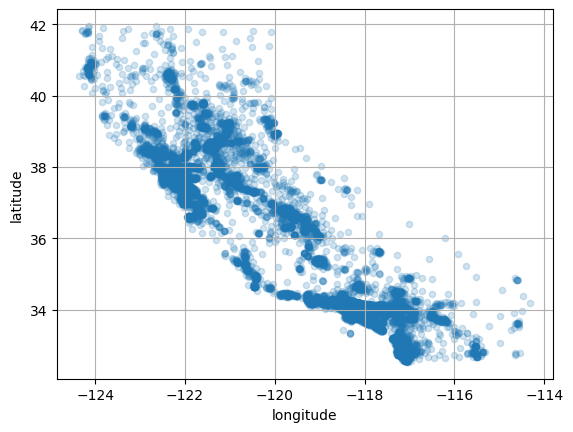

In [106]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2) # use alpha to see high density data points
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

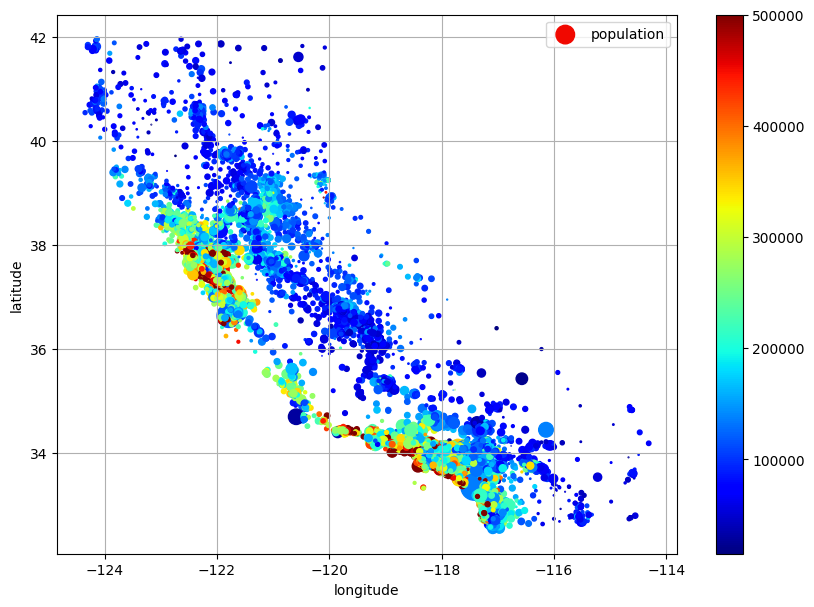

In [107]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=df["population"] / 100, label="population", # s == radius; use radius to visualize population
             c=df["median_house_value"].to_list(), cmap="jet", colorbar=True, # c == color; use color to visualize price
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

# 5. Exploratory Data Analysis

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

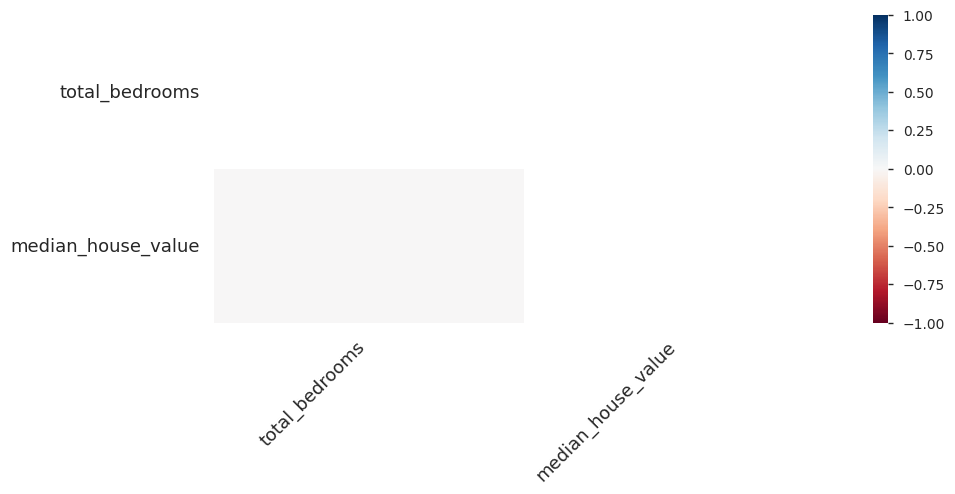

In [108]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile

In [112]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688080
total_rooms           0.134157
housing_median_age    0.105633
households            0.065845
total_bedrooms        0.049688
population           -0.024650
longitude            -0.045969
latitude             -0.144167
Name: median_house_value, dtype: float64

Text(0.5, 1.0, 'Correlation Plot')

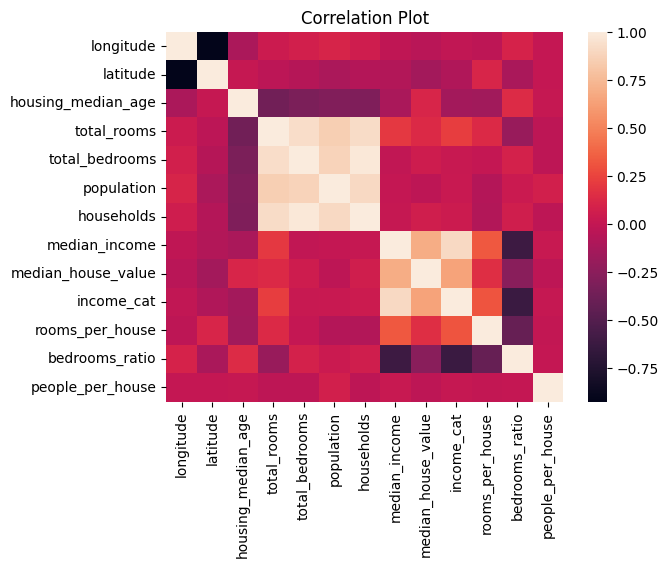

In [114]:
import seaborn as sns 
sns.heatmap(df.select_dtypes(exclude='object').corr()).set_title('Correlation Plot')


Text(0.5, 1.0, 'Ocean Proximity Analysis for House Prices')

<Axes: title={'center': 'Ocean Proximity Analysis for House Prices'}, xlabel='ocean_proximity', ylabel='median_house_value'>

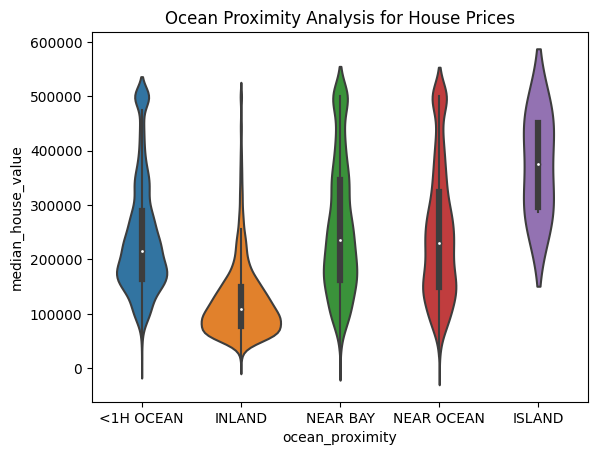

In [115]:
plt.title('Ocean Proximity Analysis for Median House Value')
sns.violinplot(x='ocean_proximity', y='median_house_value', data=train)
plt.show()

# Feature Engineering

In [113]:
df["rooms_per_house"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["people_per_house"] = df["population"] / df["households"]
corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688080
rooms_per_house       0.151951
total_rooms           0.134157
housing_median_age    0.105633
households            0.065845
total_bedrooms        0.049688
people_per_house     -0.023737
population           -0.024650
longitude            -0.045969
latitude             -0.144167
bedrooms_ratio       -0.255896
Name: median_house_value, dtype: float64

In [ ]:
import seaborn as sns 
sns.heatmap(df.select_dtypes(exclude='object').corr()).set_title('Correlation Plot')

# Preprocess data for ML 

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class Preprocessor(BaseEstimator, TransformerMixin): 
    # Train our custom preprocessors 
    numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
    categorical_columns = ['ocean_proximity']
    def fit(self, X, y=None): 

        # Create and fit simple imputer
        self.imputer = SimpleImputer(strategy='median')
        self.imputer.fit(X[self.numerical_columns])
        
        # columns = self.numerical_columns + ["rooms_per_house", "bedrooms_ratio", "people_per_house"]
        # print(columns)
        # Create and fit Standard Scaler 
        self.scaler = StandardScaler()
        self.scaler.fit(X[self.numerical_columns]) 
        
        # Create and fit one hot encoder
        self.onehot = OneHotEncoder(handle_unknown='ignore')
        self.onehot.fit(X[self.categorical_columns])
        
        return self 
        
        
    # Apply our custom preprocessors 
    def transform(self, X): 
        
        # Apply simple imputer 
        imputed_cols = self.imputer.transform(X[self.numerical_columns])
        onehot_cols = self.onehot.transform(X[self.categorical_columns])
        
        # Copy the df 
        transformed_df = X.copy()
         
        # Apply transformed columns
        transformed_df[self.numerical_columns] = imputed_cols

        # ## Create extra features
        # transformed_df["rooms_per_house"] = transformed_df["total_rooms"] / transformed_df["households"]
        # transformed_df["bedrooms_ratio"] = transformed_df["total_bedrooms"] / transformed_df["total_rooms"]
        # transformed_df["people_per_house"] = transformed_df["population"] / transformed_df["households"]
        # columns = self.numerical_columns + ["rooms_per_house", "bedrooms_ratio", "people_per_house"]
        
        transformed_df[self.numerical_columns] = self.scaler.transform(transformed_df[self.numerical_columns])        
        
        # Drop existing categorical columns and replace with one hot equiv
        transformed_df = transformed_df.drop(self.categorical_columns, axis=1) 
        transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)
        
        return transformed_df

In [7]:
preproc = Preprocessor()

In [200]:
preproc.fit(X_train)

Preprocessor()

In [202]:
preprocessed_df = preproc.transform(X_train)
preprocessed_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12139  -1.179460  0.988373           -1.003339     0.311529       -0.282741   
3255   -0.105368  0.346475            0.984148    -0.825274       -0.918408   
15408   0.853820 -0.899838           -0.605842    -0.386044       -0.313347   
13648  -0.460068  2.192518           -1.003339    -0.374198       -0.421646   
15348   0.938748 -0.927950           -1.082838     1.253777        0.491832   

       population  households  median_income income_cat  \
12139   -0.138074   -0.255898       1.574653          5   
3255    -0.877947   -0.920097      -0.383842          3   
15408    0.731211   -0.261087      -0.377872          3   
13648   -0.408498   -0.367462      -0.214332          3   
15348    0.853482    0.532840       1.931423          5   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
12139                          1                       0   
3255                           0                       1   
15408                          1                       0   
13648                          0                       1   
15348                          1                       0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
12139                       0                         0   
3255                        0                         0   
15408                       0                         0   
13648                       0                         0   
15348                       0                         0   

       ocean_proximity_NEAR OCEAN  
12139                           0  
3255                            0  
15408                           0  
13648                           0  
15348                           0

In [203]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12139 to 14874
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   longitude                   16512 non-null  float64 
 1   latitude                    16512 non-null  float64 
 2   housing_median_age          16512 non-null  float64 
 3   total_rooms                 16512 non-null  float64 
 4   total_bedrooms              16512 non-null  float64 
 5   population                  16512 non-null  float64 
 6   households                  16512 non-null  float64 
 7   median_income               16512 non-null  float64 
 8   income_cat                  16512 non-null  category
 9   ocean_proximity_<1H OCEAN   16512 non-null  int64   
 10  ocean_proximity_INLAND      16512 non-null  int64   
 11  ocean_proximity_ISLAND      16512 non-null  int64   
 12  ocean_proximity_NEAR BAY    16512 non-null  int64   
 13  ocean_proximity_N

In [138]:
onehot = OneHotEncoder(handle_unknown='ignore')
onehot_cols = onehot.fit(train_features[['ocean_proximity']])

In [139]:
onehot.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [141]:
onehot_cols = onehot.transform(train_features[['ocean_proximity']])

In [142]:
onehot_cols.toarray().astype(int)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0]])

In [143]:
onehot.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor


pipelines = {
    'ridge': make_pipeline(Preprocessor(), Ridge()), 
    'rf': make_pipeline(Preprocessor(), RandomForestRegressor()), 
    'gb': make_pipeline(Preprocessor(), GradientBoostingRegressor()), 
    'xg': make_pipeline(Preprocessor(), XGBRegressor()), 
}


grid = {
    'ridge':{'ridge__alpha':[0.05, 0.25, 0.5, 1.0]}, 
    'rf':{
        'randomforestregressor__n_estimators':[100,200,300], 
        'randomforestregressor__max_depth':[5,6,7,None]
    },
    'gb':{
        'gradientboostingregressor__n_estimators':[100,200,300], 
        'gradientboostingregressor__max_depth':[5,6,7, None]
    },
    'xg':{
       'xgbregressor__n_estimators':[100,200,300], 
       'xgbregressor__max_depth':[5,6,7,None]
    }
}

In [162]:
Ridge??

Init signature:
Ridge(
    alpha=1.0,
    *,
    fit_intercept=True,
    copy_X=True,
    max_iter=None,
    tol=0.0001,
    solver='auto',
    positive=False,
    random_state=None,
)
Source:        
class Ridge(MultiOutputMixin, RegressorMixin, _BaseRidge):
    """Linear least squares with l2 regularization.

    Minimizes the objective function::

    ||y - Xw||^2_2 + alpha * ||w||^2_2

    This model solves a regression model where the loss function is
    the linear least squares function and regularization is given by
    the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
    This estimator has built-in support for multi-variate regression
    (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

    Read more in the :ref:`User Guide <ridge_regression>`.

    Parameters
    ----------
    alpha : {float, ndarray of shape (n_targets,)}, default=1.0
        Constant that multiplies the L2 term, controlling regularization
        strength. `alpha` must 

In [9]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train = train.drop('median_house_value', axis=1)
y_train = train['median_house_value']

fit_models = {}
for algo, pipeline in pipelines.items(): 
    try: 
        print(algo)
        model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=10, scoring='r2')
        model.fit(X_train, y_train) 
        fit_models[algo] = model 
    except Exception as e: 
        print(f'Model {algo} had an error {e}')

ridge


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                       ('ridge', Ridge())]),
             n_jobs=-1, param_grid={'ridge__alpha': [0.05, 0.25, 0.5, 1.0]},
             scoring='r2')

rf


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [5, 6, 7, None],
                         'randomforestregressor__n_estimators': [100, 200,
                                                                 300]},
             scoring='r2')

gb
